<a href="https://colab.research.google.com/github/Sidhtang/learnings-from-hands-on-machine-learning-book/blob/main/learnings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
fashion_mnist= keras.datasets.fashion_mnist

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
#scaling the features as we are going to train the network with gradient descent
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
 class_names[y_train[0]]

'Coat'

In [ ]:
model = keras.models.Sequential()
#It is a Flatten layer whoserole is to convert each input image into a 1D array: if it receives input data X, itcomputes X.reshape(-1, 1). This layer does not have any parameters; computes X.reshape(-1, 1). This layer does not have any parameters; it is just
#there to do some simple preprocessing

model.add(keras.layers.Flatten(input_shape=[28, 28]))
#we add a Dense hidden layer with 300 neurons. It will use the ReLU activa‐
#tion function. Each Dense layer manages its own weight matrix, containing all the
#connection weights between the neurons and their inputs.
model.add(keras.layers.Dense(300, activation="relu"))#then we add a second Dense hidden layer with 100 neurons, also using the ReLU
model.add(keras.layers.Dense(100, activation="relu"))
#• Finally, we add a Dense output layer with 10 neurons (one per class), using the
#softmax activation function (because the classes are exclusive).
model.add(keras.layers.Dense(10, activation="softmax"))





In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


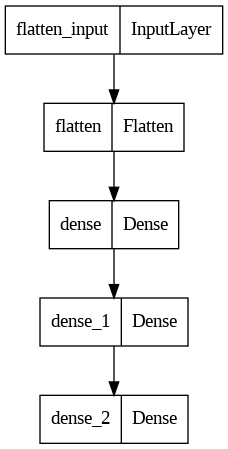

In [ ]:
keras.utils.plot_model(model)

In [ ]:
model.layers
hidden1=model.layers[1]
hidden1.name

'dense'

In [ ]:
weights,biases = hidden1.get_weights()
weights

array([[-0.05252008,  0.0474299 , -0.0142237 , ...,  0.01016407,
        -0.04323277, -0.01106902],
       [ 0.03029794, -0.04294352,  0.00702543, ...,  0.00527667,
        -0.01862789,  0.02888503],
       [-0.04765395, -0.0400983 ,  0.02049428, ...,  0.05697906,
        -0.06682444, -0.00194737],
       ...,
       [-0.00361327,  0.03998405, -0.01243551, ..., -0.00355782,
        -0.00814091, -0.03143976],
       [ 0.01313678, -0.06638062, -0.06198812, ...,  0.05738445,
         0.07226814, -0.07002931],
       [-0.02303044, -0.04505741, -0.04605266, ...,  0.01970651,
         0.01737826, -0.03899394]], dtype=float32)

In [ ]:
#compiling the model
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])
#First, we use the "sparse_categorical_cross
#entropy" loss because we have sparse labels (i.e., for each instance, there is just a tar‐
#get class index, from 0 to 9 in this case), and the classes are exclusive.


In [ ]:
#training and evaluating the model
history=model.fit(X_train,y_train,epochs=30,
              validation_data=(X_valid, y_valid))


Epoch 1/30
1719/1719 [==============================] - 17s 9ms/step - loss: 0.7165 - accuracy: 0.7631 - val_loss: 0.5340 - val_accuracy: 0.8086
Epoch 2/30
1719/1719 [==============================] - 15s 8ms/step - loss: 0.4844 - accuracy: 0.8293 - val_loss: 0.4456 - val_accuracy: 0.8480
Epoch 3/30
1719/1719 [==============================] - 18s 10ms/step - loss: 0.4394 - accuracy: 0.8459 - val_loss: 0.4209 - val_accuracy: 0.8558
Epoch 4/30
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4133 - accuracy: 0.8547 - val_loss: 0.3924 - val_accuracy: 0.8684
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3921 - accuracy: 0.8608 - val_loss: 0.4122 - val_accuracy: 0.8558
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3770 - accuracy: 0.8669 - val_loss: 0.3646 - val_accuracy: 0.8712
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3628 - accuracy: 0.8715 - val_loss: 0.3623 - val_accu

In [ ]:
# Learning curves: the mean training loss and accuracy measured over each
#epoch, and the mean validation loss and accuracy measured at the end of each epoch

In [ ]:
#using the model to make predicitions

In [ ]:
X_new=X_test[:3]
y_proba=model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 102ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_pred_prob = model.predict(X_new)  # Step 1: Get predicted probabilities
y_pred = np.argmax(y_pred_prob, axis=1)  # Step 2: Get the predicted class indices
predicted_class_names = np.array(class_names)[y_pred]

1/1 [==============================] - 0s 31ms/step


In [ ]:
y_new=y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [ ]:
def plot_images(images, true_labels, predicted_labels, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(len(images)):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        true_label = class_names[true_labels[i]]
        predicted_label = class_names[predicted_labels[i]]
        color = 'blue' if predicted_label == true_label else 'red'
        plt.xlabel(f"{predicted_label} ({true_label})", color=color)
    plt.show()

In [ ]:
#build a regression using MLP sequential API

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
housing =fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
 housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
 X_train_full, y_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)



In [ ]:
 #Since the dataset is quite noisy, we just use a single hidden layer with fewer
#neurons than before, to avoid overfitting:
model = keras.models.Sequential([
 keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
 keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error",optimizer='sgd')
history = model.fit(X_train, y_train, epochs=20,
 validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)



Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.2204 - val_loss: 0.5216
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5105 - val_loss: 0.4725
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4777 - val_loss: 0.4513
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4551 - val_loss: 0.4541
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4396 - val_loss: 0.5243
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4550 - val_loss: 0.4256
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4258 - val_loss: 0.4169
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4163 - val_loss: 0.4188
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4092 - val_loss: 0.4143
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4042 - val_loss: 0.4051

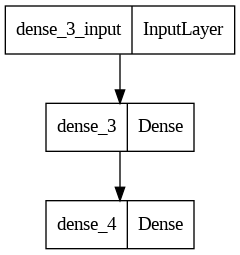

In [ ]:
keras.utils.plot_model(model)

In [ ]:
#building a complex model uisng the  keras
#architecture makes it possible for the neural network to learn both
#deep patterns (using the deep path) and simple rules (through the short path).17 In
#contrast, a regular MLP forces all the data to flow through the full stack of layers;


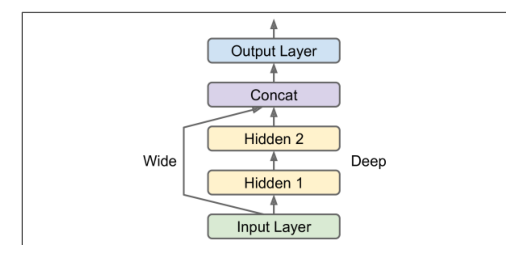

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/content/Screenshot 2024-05-16 144238.png')
plt.imshow(img)
plt.axis('off')
plt.show()
#this will be our complex model

In [1]:
#sending 6 features to deep path and 5 features to wide path
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 =keras.layers.Dense(30,activation="tanh")(input_B)
hidden2 = keras.layers.Dense(30, activation="tanh")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

NameError: name 'keras' is not defined

In [ ]:
#when we call the fit() method, instead of passing a single input
#matrix X_train, we must pass a pair of matrices (X_train_A, X_train_B):

In [ ]:
model.compile(loss="mse",optimizer=keras.optimizers.SGD(lr=1e-3))
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
 validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)



Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 0.6826 - val_loss: 0.5070
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5028 - val_loss: 0.5037
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4908 - val_loss: 0.4859
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4852 - val_loss: 0.4803
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4784 - val_loss: 0.4755
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4750 - val_loss: 0.4780
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4688 - val_loss: 0.4803
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4699 - val_loss: 0.4627
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4668 - val_loss: 0.4619
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4592 - val_loss: 0.4565

In [ ]:
y_pred = model.predict((X_new_A, X_new_B))

1/1 [==============================] - 0s 65ms/step


In [ ]:
#fine tunning of neural network using hyperparameters

In [1]:
import tensorflow as tf
from tensorflow import keras

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model


In [2]:
#batch normalization using keras
#The technique consists of
#adding an operation in the model just before or after the activation function of each
##scales and shifts the result using two new parameter vectors per layer:

In [4]:
model=keras.models.Sequential([
      keras.layers.Flatten(input_shape=[28,28]),
      keras.layers.BatchNormalization(),
      keras.layers.Dense(300,activation="elu", kernel_initializer= "he_normal"),
      keras.layers.BatchNormalization(),
 keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
 keras.layers.BatchNormalization(),
 keras.layers.Dense(10, activation="softmax")
])

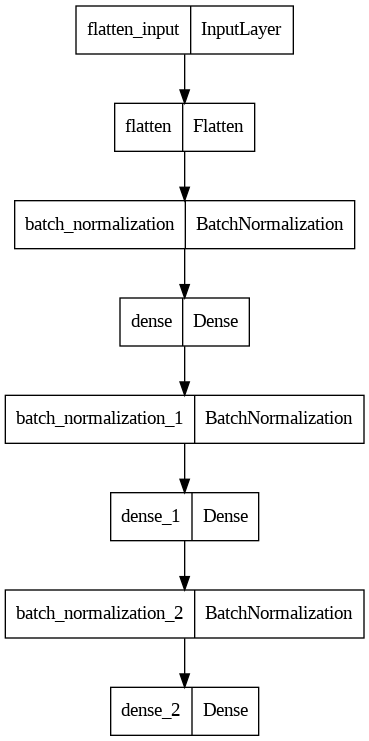

In [5]:
keras.utils.plot_model(model)

In [ ]:
#Another popular technique to mitigate the exploding gradients problem is to clip the
#gradients during backpropagation so that they never exceed some threshold. This is
#called Gradient Clipping.
#12 This technique is most often used in recurrent neural net‐
#works, as Batch Normalization is tricky to use in RNNs

In [6]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)
model.compile(loss="mse", optimizer=optimizer)


In [ ]:
#existing neural network that accomplishes a similar task
#then reuse the lower layers of this network. This technique is called transfer learning.

In [ ]:
#Transfer Learning with Keras
#w want to tackle a different task: i have images
#of sandals and shirts, and i want to train a binary classifier (positive=shirt,
#negative=sandal). my dataset is quite small; i only have 200 labeled images.
#When i will train a new model for this task (let’s call it model B) with the same archi‐
#tecture as model A
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())
for layer in model_B_on_A.layers[:-1]:
 layer.trainable = False
model_B_on_A.compile(loss="binary_crossentropy", optimizer="sgd",
 metrics=["accuracy"])
istory = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
 validation_data=(X_valid_B, y_valid_B))
for layer in model_B_on_A.layers[:-1]:
 layer.trainable = True
optimizer = keras.optimizers.SGD(lr=1e-4) # the default lr is 1e-2
model_B_on_A.compile(loss="binary_crossentropy", optimizer=optimizer,
 metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
 validation_data=(X_valid_B, y_valid_B))